<a href="https://colab.research.google.com/github/thomasathul/Rice-Plant-Disease-Detection/blob/main/InceptionV3model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train'
valid_path = '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation'


In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/*')

In [8]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1385 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 492 images belonging to 4 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
44/44 [==============================] - 1046s 24s/step - loss: 8.2049 - accuracy: 0.3363 - val_loss: 6.0521 - val_accuracy: 0.4106
Epoch 2/10
44/44 [==============================] - 398s 9s/step - loss: 3.2631 - accuracy: 0.5132 - val_loss: 3.7470 - val_accuracy: 0.4553
Epoch 3/10
44/44 [==============================] - 389s 9s/step - loss: 2.5826 - accuracy: 0.5542 - val_loss: 3.5396 - val_accuracy: 0.4512
Epoch 4/10
44/44 [==============================] - 393s 9s/step - loss: 3.0403 - accuracy: 0.5425 - val_loss: 3.8291 - val_accuracy: 0.4675
Epoch 5/10
44/44 [==============================] - 394s 9s/step - loss: 2.7771 - accuracy: 0.5406 - val_loss: 4.8539 - val_accuracy: 0.4553
Epoch 6/10
44/44 [==============================] - 388s 9s/step - loss: 2.5514 - accuracy: 0.6074 - val_loss: 5.1580 - val_accuracy: 0.4492
Epoch 7/10
44/44 [==============================] - 405s 9s/step - loss: 2.3991 - accuracy: 0.6307 - val_loss: 5.9498 - val_accuracy: 0.4533
Epoch 8/10


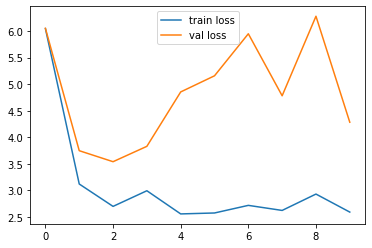

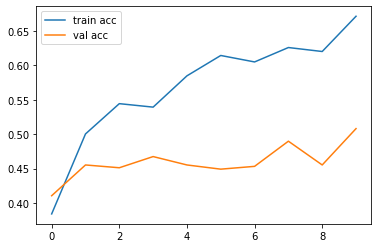

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('ricemodel_inception.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[5.1692994e-10, 1.8634037e-10, 1.0000000e+00, 5.2199933e-08],
       [1.0700713e-07, 2.7860847e-07, 9.9999499e-01, 4.6146738e-06],
       [2.4310179e-14, 4.1871655e-19, 4.2141349e-11, 1.0000000e+00],
       ...,
       [1.4409526e-06, 9.9757737e-01, 2.4212040e-03, 2.1399196e-10],
       [9.9999988e-01, 9.6415771e-11, 7.8819767e-08, 3.0016472e-11],
       [9.9501711e-01, 1.7116041e-09, 4.6831441e-16, 4.9829036e-03]],
      dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 2, 3, 0, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 2, 0, 0, 1, 1,
       1, 0, 0, 3, 2, 1, 2, 2, 3, 1, 0, 0, 0, 3, 1, 0, 2, 1, 3, 1, 1, 0,
       1, 3, 3, 0, 1, 0, 1, 0, 0, 3, 3, 0, 3, 0, 1, 1, 3, 2, 1, 1, 0, 3,
       1, 2, 0, 3, 3, 2, 3, 0, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 2, 0, 1, 1,
       2, 0, 1, 0, 1, 3, 2, 0, 3, 2, 3, 1, 3, 1, 1, 0, 0, 1, 3, 0, 1, 1,
       0, 1, 0, 0, 0, 3, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 2, 3, 3, 1, 1, 1, 1, 3, 1, 0, 3, 3, 3, 1, 3,
       1, 0, 3, 0, 1, 0, 3, 0, 2, 0, 1, 3, 3, 2, 1, 3, 1, 1, 0, 3, 2, 3,
       0, 1, 0, 1, 1, 2, 0, 1, 1, 3, 0, 3, 3, 0, 1, 1, 3, 3, 1, 2, 1, 3,
       1, 0, 3, 0, 3, 3, 1, 1, 3, 2, 0, 3, 1, 1, 3, 0, 1, 3, 1, 3, 1, 2,
       1, 1, 3, 2, 1, 3, 3, 2, 1, 0, 2, 0, 1, 0, 1, 1, 3, 0, 3, 0, 3, 3,
       1, 2, 1, 2, 3, 0, 1, 0, 3, 2, 2, 0, 3, 0, 2, 0, 1, 2, 3, 0, 0, 2,
       3, 3, 1, 1, 2, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 1, 0, 3, 0, 1, 3,
       1, 2, 0, 0, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3,

In [60]:
img=image.load_img('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation/BrownSpot/IMG_20190419_133703.jpg',target_size=(224,224))

In [61]:
x=image.img_to_array(img)
x

array([[[225., 224., 238.],
        [235., 234., 248.],
        [232., 231., 245.],
        ...,
        [203., 202., 216.],
        [213., 212., 226.],
        [209., 208., 222.]],

       [[234., 233., 247.],
        [228., 227., 241.],
        [235., 234., 248.],
        ...,
        [210., 209., 223.],
        [210., 209., 223.],
        [209., 208., 222.]],

       [[238., 237., 251.],
        [227., 226., 240.],
        [231., 230., 244.],
        ...,
        [207., 206., 220.],
        [216., 215., 229.],
        [210., 209., 223.]],

       ...,

       [[240., 240., 248.],
        [238., 237., 253.],
        [242., 241., 255.],
        ...,
        [214., 213., 227.],
        [201., 200., 214.],
        [207., 206., 220.]],

       [[239., 242., 249.],
        [235., 234., 248.],
        [239., 239., 251.],
        ...,
        [214., 213., 227.],
        [200., 199., 213.],
        [213., 212., 226.]],

       [[234., 234., 242.],
        [241., 240., 254.],
        [239., 2

In [62]:
x.shape

(224, 224, 3)

In [63]:
x=x/255

In [64]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [65]:
model.predict(img_data)

array([[2.0471789e-02, 1.2462525e-02, 7.3270593e-04, 9.6633297e-01]],
      dtype=float32)

In [66]:

a=np.argmax(model.predict(img_data), axis=1)

In [69]:
a==3

array([ True])